In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [25]:
spotify = pd.read_csv('songs_normalize.csv', usecols=[2,3,5,6,7,8,9,10,11,12,13,14,15,16])
spotify['explicit'] = spotify['explicit']*1
# spotify = pd.DataFrame({'duration':_arg1, 'explicit':arg2, 'danceability':_arg3, 'energy':_arg4, 'key':_arg5, 'loudness':_arg5, 'mode':_arg6, 'speechiness':_arg7, 'acousticness':_arg8, 'instrumentalness':_arg9, 'liveness':_arg10, 'valence':_arg11, 'tempo':_arg12, 'popularity':_arg13})

In [26]:
x = np.array(spotify.iloc[:,np.r_[0,1,3:14]])
y = np.array(spotify['popularity'])

In [27]:
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)
y = min_max_scaler.fit_transform(y.reshape(-1,1))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2)

In [29]:
# Hyper Parameters
loss = 'mean_squared_error'
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9)
batch_size = 20
epoch = 20

In [8]:
model = Sequential()
model.add(Dense(units=13, activation='relu', input_dim=13))
model.add(Dense(units=26, activation='relu', input_dim=13))
model.add(Dense(units=1, activation='relu'))

In [31]:
def training_process(model, loss, optimizer, batch_size, epoch):
    model.compile(loss=loss,
                    optimizer=optimizer)
    history = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)
    return history

In [32]:
history = training_process(model, loss, optimizer, batch_size, epoch)

Epoch 1/20
62/80 [======================>.......] - ETA: 0s - loss: 0.1255

2022-07-23 19:22:50.070632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 4/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 7/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 8/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 9/20
80/80 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 10/20
80/80 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 11/20
80/80 [==============================] - 0s 2ms/step - loss: 0.0586
Epoch 12/20
80/80 [==============================] - 0s 3ms/step - loss: 0.0583
Epoch 13/20
80/80 [==============================] - 0s 3ms/

In [33]:
loss_and_metrics = model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.0589


2022-07-23 19:23:24.934535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


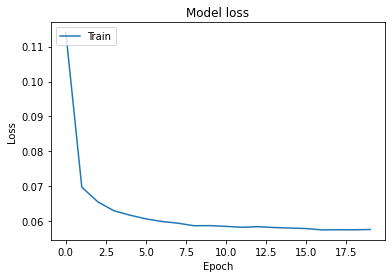

In [34]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [2]:
model = load_model('popularity.h5')

Metal device set to: Apple M1 Pro


2022-07-24 03:19:48.752062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-24 03:19:48.752346: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


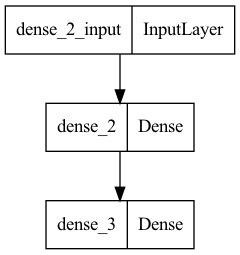

In [3]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')